<a href="https://colab.research.google.com/github/flat35hd99/report_magnetical_material/blob/master/20200430magnetical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#問題（1）
室温におけるNiの磁化の磁場依存性の測定データを使用して誘導起電力の振幅V0
(V)を磁場H(Oe)に対してプロットしたグラフを作成せよ。

## 回答

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

data_H, data_T, data_V = np.loadtxt("/content/drive/My Drive/Colab Notebooks/Data_Magnetism/Ni/M-H_Ni_300K.txt", skiprows=1, unpack=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


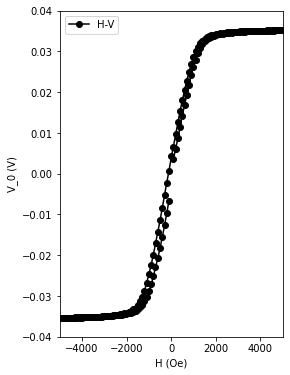

In [2]:
fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)
ax.plot(data_H,data_V, "o-", color="k", label="H-V")
ax.set_xlim(-5000,5000)
ax.set_ylim(-0.04,0.04)
ax.set_xlabel("H (Oe)")
ax.set_ylabel("V_0 (V)")
ax.legend(loc="upper left")

#問題（２）
磁場の印可により飽和する誘導起電力の振幅V_0(V)を見積もり、既知の Niの飽和磁化M_0の値を用いて磁気双極子モーメントmと振幅V0の比例係数αを求めよ。 Niの飽和磁化M_0の値は室温(298 K)で55.07 emu/g（質量磁化）であり、使用した試料の質量は0.2704 gとする。

## 回答
問題（1）の結果から、V = 0.0351, -0.03533まで振れており、H = 約2000, -2000(Oe)付近から漸近しているため、この二つの値の絶対値の平均を取った V = 0.03522をV<sub>0</sub>として計算する。  
m<sub>CGS</sub> = m<sub>si</sub> / (4π e-10) = μ<sub>0</sub>MV / (4π e-10)  
また
α = m<sub>CGS</sub>/V<sub>0</sub>  


In [3]:
mu_0 = 1 # 磁気定数
M = 55.07 # 質量磁化 55.07 emu/g
mass_nickel = 0.2704 # 試料の質量0.2704 g

m_cgs = mu_0 * M * mass_nickel # [emu] :cgs単位系での磁化 
m_si = m_cgs * 4 * np.pi * 10 ** -10 # si単位系での磁化

alpha_experiment = m_cgs / 0.03522 # V_0の実験結果から取った値

print("m_cgs =",m_cgs)
print("α =", alpha_experiment)

m_cgs = 14.890927999999999
α = 422.79750141964786




理論値からの算出では  
V<sub>0</sub> = 3m<sub>si</sub>aωNS / 4piR<sup>2</sup>  
S = 95 mm<sup>2</sup>, N = 14500 turn * 4個, R = 19.5 mm, a = 2.5 mm, ω = 2πf, f = 10Hz, θ = 42°, f(θ) = 1.18, m<sub>si</sub> = 4π * 10<sup>-10</sup>m<sub>CGS</sub>を代入して、 

In [4]:
a = 2.5 * 10**-3 # 2.5 mm = 2.5e-3 m
f = 10 # 10Hz
omega = 2 * np.pi * f
N = 14500 * 4 # 14500turn * 4個
S = 95 * 10 ** -6 # 95 mm**2 = 95e-6 m**2
f_theta = 1.18
R = 19.5 * 10 ** -3 # 19.5mm = 19.5e-3 m

V_0 = ((3 * m_si * a * omega * N * S)/(4 * np.pi * R ** 4)) * f_theta
theoretical_alpha = m_cgs/V_0

print("V_0 =", V_0)
print("α =", theoretical_alpha)

V_0 = 0.03155426410566
α = 471.91491933189974


# 問題（3）
計算で求めた比例係数αと値比較して互いに近い値であるか確認せよ。
(以後の実験では標準試料Niの磁化測定で決定した比例係数αとを用いるので重要な作業である。)
## 回答
~~今回の計算では合わなかった。~~  
実験結果から求めた値はα = 4.228 e+2, 理論値ではα = 4.719 e+2である。今後の実験ではこの実験器具のα = 4.228 e+2として計算していく。（これを較正と呼ぶ。）
# 問題（4）
室温におけるNiの磁化の磁場依存性の測定データを使用してモル磁化M (emu/mol)を磁場H (Oe)に対してプロットしたグラフを作成せよ。(Niの式量は58.6934 g/molである。)
## 回答
モル磁化 M( emu/mol )は測定から得られた各 Vから求める。  
さきほど得たαの値に計測値Vを掛けて、試料のモル数で割る。

maximum = 3229.511432724853
minimum = -3246.948408349111
average of absolute value = 3238.229920536982


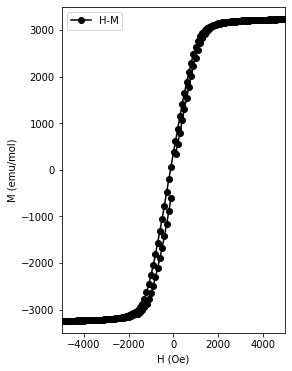

In [7]:
nickel_mass_number = 58.6934 # ニッケルの質量数
sample_mole = mass_nickel / nickel_mass_number # [mol] 試料のモル数
alpha_experiment = 4.228 * 10 ** 2

molar_magnetization = (alpha_experiment / sample_mole) * data_V # 計測データVの全要素にαをかけてモルで割ることで求めている。
molar_magnetization_maximum = np.max(molar_magnetization)
molar_magnetization_minimum = np.min(molar_magnetization)
molar_magnetization_average_of_absolute_value = (abs(molar_magnetization_maximum) + abs(molar_magnetization_minimum))/2

print('maximum =',molar_magnetization_maximum)
print('minimum =', molar_magnetization_minimum)
print('average of absolute value =',molar_magnetization_average_of_absolute_value)

fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)
ax.plot(data_H,molar_magnetization, "o-", color="k", label="H-M")
ax.set_xlim(-5000,5000)
ax.set_ylim(-3500, +3500)
ax.set_xlabel("H (Oe)")
ax.set_ylabel("M (emu/mol)")
ax.legend(loc="upper left")

#問題（5）
Niの１原子当たりの飽和磁化M<sub>0</sub>はボーア磁子μ<sub>B</sub>を単位にした場合、どのような値になるか求めよ。
(μ<sub>B</sub>= 9.27×10−21 (emu)であり磁化と同じ単位である。)
## 回答
結果は下記より 1.68×10<sup>-4</sup>


In [8]:
avogadro_constant = 6.02214 * 10**23 # アボガドロ数
bohr_magneton = 9.27*10**-21 # [emu] ボーア磁子
magnetization_per_atom = (M * 1 / 58.6934)/avogadro_constant # [emu/atom(?)]
magnetization_per_atom_per_bohr_magneton = magnetization_per_atom / bohr_magneton # [/atom(?)]

print('result =',magnetization_per_atom_per_bohr_magneton)

result = 0.0001680719452715714


# 問題（6）
室温におけるNiの磁化の磁場依存性において履歴現象(ヒステリシス)が見られるが、履歴現象(ヒステリシス)について強磁性と関係させて説明せよ。
## 回答

